In [125]:
# init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
directory = './data/'
appendix = '50k'
selected = False
print('directory: ', f"{directory}filename_{appendix}.logs")
print('Selected: ', selected)

directory:  ./data/filename_50k.logs
Selected:  False


In [126]:
# processing
if selected == True:
    hits = f"{directory}hits_{appendix}.log"
    primaries = f"{directory}primaries_{appendix}.log"
    volume_hits = f"{directory}volume_hits_{appendix}.log"
else:
    directory = '../build/'
    hits = f"{directory}hits.log"
    primaries = f"{directory}primaries.log"
    volume_hits = f"{directory}volume_hits.log"
hits = pd.read_csv(hits, sep=' ')
primaries = pd.read_csv(primaries, sep=' ')
volume_hits = pd.read_csv(volume_hits, sep=' ')

hits['RET_id'] = '(' + hits['run'].astype(str) + ',' + hits['event'].astype(str) + ',' + hits['track'].astype(str) + ')'
volume_hits['RET_id'] = '(' + volume_hits['run'].astype(str) + ',' + volume_hits['event'].astype(str) + ',' + volume_hits['track'].astype(str) + ')'

# merge `volume_hits`'s `volume` column into `hits` by `RET_id`
hits = pd.merge(hits, volume_hits[['RET_id', 'volume']], on='RET_id', how='left')
                
# convert/quick
# merge run, event, and track into one string
hits['end_t_[mus]'] = hits['end_t_[ns]'] / 1000
hits['start_t_[mus]'] = hits['start_t_[ns]'] / 1000
hits['energy_deposit_[meV]'] = hits['energy_deposit_[eV]'] * 1000
primaries['start_t_[mus]'] = primaries['start_t_[ns]'] / 1000
primaries['energy_[meV]'] = primaries['energy_[eV]'] * 1000

hits.head()

,run,event,track,particle,start_energy_[eV],start_x_[mm],start_y_[mm],start_z_[mm],start_t_[ns],energy_deposit_[eV],track_weight,end_x_[mm],end_y_[mm],end_z_[mm],end_t_[ns],RET_id,volume,end_t_[mus],start_t_[mus],energy_deposit_[meV]
0,0,0,15,phononTS,0.003333,-1.472080,1.487710,0.023192,5435.2600,0.003333,1,35.88610,-0.064613,-0.5,49331.80,"(0,0,15)",World,49.33180,5.435260,3.33340
1,0,0,14,phononL,0.003401,-1.472080,1.487710,0.023192,5435.2600,0.003401,1,-35.19020,-1.236190,0.5,27823.70,"(0,0,14)",World,27.82370,5.435260,3.40056
2,0,0,17,phononTF,0.003588,6.278520,0.502715,-0.289190,7524.6300,0.003588,1,25.10110,-1.107170,0.5,31798.60,"(0,0,17)",feed16,31.79860,7.524630,3.58808
3,0,0,21,phononTF,0.005101,-0.020229,-0.056127,0.089819,72.7031,0.005101,1,-2.59814,-5.350460,0.5,6943.28,"(0,0,21)",kid_ind48,6.94328,0.072703,5.10067
4,0,0,23,phononTF,0.003564,-0.773677,3.860780,0.278066,4396.1000,0.003564,1,-2.54650,10.421500,-0.5,7575.86,"(0,0,23)",World,7.57586,4.396100,3.56390


In [127]:
# sanity checks & basic statistics

# numbers
print('#Primaries:\t\t\t', len(primaries))
print('#Hits:\t\t\t\t', len(hits))
print('#Hits/Primary:\t\t\t', round(len(hits) / len(primaries), 2), '\n')

# energy calculations
energy_deposited = hits['energy_deposit_[meV]'].sum()
initial_energy = primaries['energy_[eV]'].sum()*1000
# get all events with 0 energy deposited
zero_deposits = volume_hits[volume_hits['deposit'] == 0]
# sum the total energy of these events
missed_energy = zero_deposits['energy'].sum() * 1000 # convert to meV

print('Initial energy:\t\t\t', round(initial_energy, 2), 'meV')
print('Energy deposited:\t\t', round(energy_deposited, 2), 'meV')
print('Energy not deposited:\t\t', round(missed_energy, 2), 'meV')
print('Energy change:\t\t\t+', round(energy_deposited - initial_energy, 20), 'meV')
print('With missed energy:\t\t+', round(energy_deposited + missed_energy - initial_energy, 20), 'meV', '\n')


# check for photons with large energy depositions
large_deposits = hits[hits['energy_deposit_[meV]'] > 10]
print('#Large energy depositions:\t', len(large_deposits))
if len(large_deposits) > 0:
    print('Average large energy deposition:', round(large_deposits['energy_deposit_[meV]'].mean(), 2), "meV", '\n')
else:
    print()

# determine if track_id is unique
print('`RET_id` unique?:\t\t', len(hits['RET_id']) == len(hits['RET_id'].unique()), '\n')

# print the minimum/maximums of each dimension
print('Minimums:')
print("x [mm]:\t\t", hits['end_x_[mm]'].min())
print("y [mm]:\t\t", hits['end_y_[mm]'].min())
print("z [mm]:\t\t", hits['end_z_[mm]'].min())
print("t [mus]:\t", hits['end_t_[mus]'].min())
print("energy [meV]:\t", hits['energy_deposit_[meV]'].min(), '\n')
print('Maximums:')
print("x [mm]:\t\t", hits['end_x_[mm]'].max())
print("y [mm]:\t\t", hits['end_y_[mm]'].max())
print("z [mm]:\t\t", hits['end_z_[mm]'].max())
print("t [mus]:\t", hits['end_t_[mus]'].max())
print("energy [meV]:\t", hits['energy_deposit_[meV]'].max(), '\n')

#Primaries:			 1
#Hits:				 223
#Hits/Primary:			 223.0 

Initial energy:			 1000 meV
Energy deposited:		 845.04 meV
Energy not deposited:		 154.96 meV
Energy change:			+ -154.957807 meV
With missed energy:		+ 2.99999999242573e-06 meV 

#Large energy depositions:	 0

`RET_id` unique?:		 True 

Minimums:
x [mm]:		 -38.2841
y [mm]:		 -32.4733
z [mm]:		 -0.5
t [mus]:	 0.284634
energy [meV]:	 0.756579 

Maximums:
x [mm]:		 35.8861
y [mm]:		 33.5758
z [mm]:		 0.5
t [mus]:	 87.57469999999999
energy [meV]:	 9.89038 



In [ ]:
# do histogram

/tmp/ipykernel_951355/483214900.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_grouped = hits.groupby('time_bin')['energy_deposit_[meV]'].sum() / len(primaries)


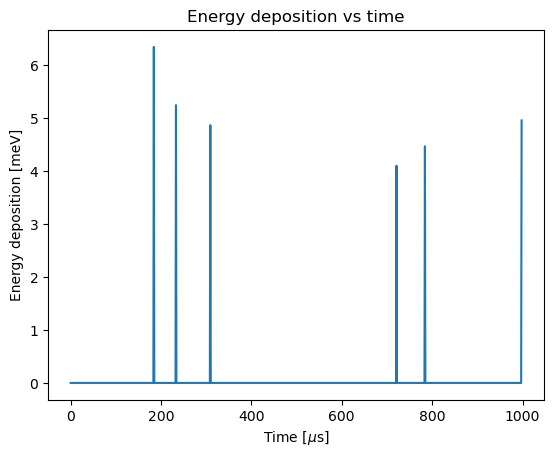

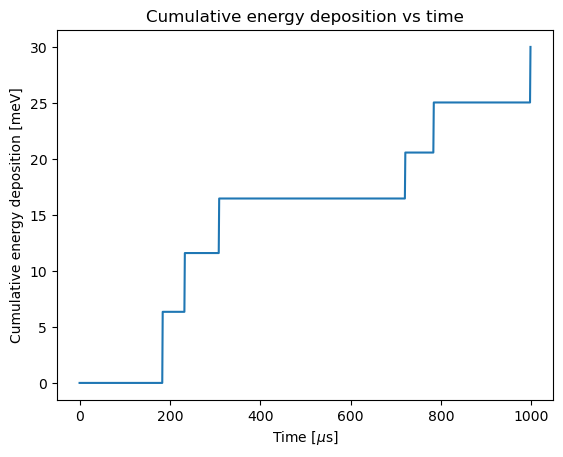

In [187]:
# plot energy deposition vs time
# bin the time values into 1000 bins
time_bins = np.linspace(0, hits['end_t_[mus]'].max(), 1000)
hits['time_bin'] = pd.cut(hits['end_t_[mus]'], time_bins)

# group by time bin and sum energy deposition and divide by number of primaries
time_grouped = hits.groupby('time_bin')['energy_deposit_[meV]'].sum() / len(primaries)
time_grouped.plot()
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Energy deposition [meV]')
plt.title('Energy deposition vs time')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()

# same thing but cumulative
time_grouped.cumsum().plot()
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Cumulative energy deposition [meV]')
plt.title('Cumulative energy deposition vs time')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()


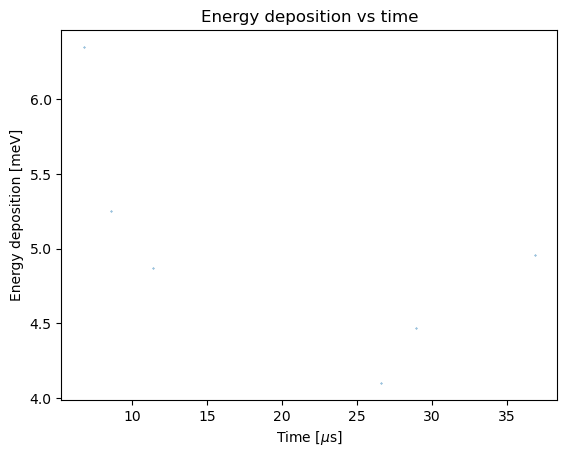

In [186]:
# scatter plot of time vs energy deposition
time = hits['end_t_[mus]']
energy = hits['energy_deposit_[meV]']
plt.scatter(time, energy, s=0.1)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Energy deposition [meV]')
plt.title('Energy deposition vs time')
# plt.yscale('log')
plt.show()



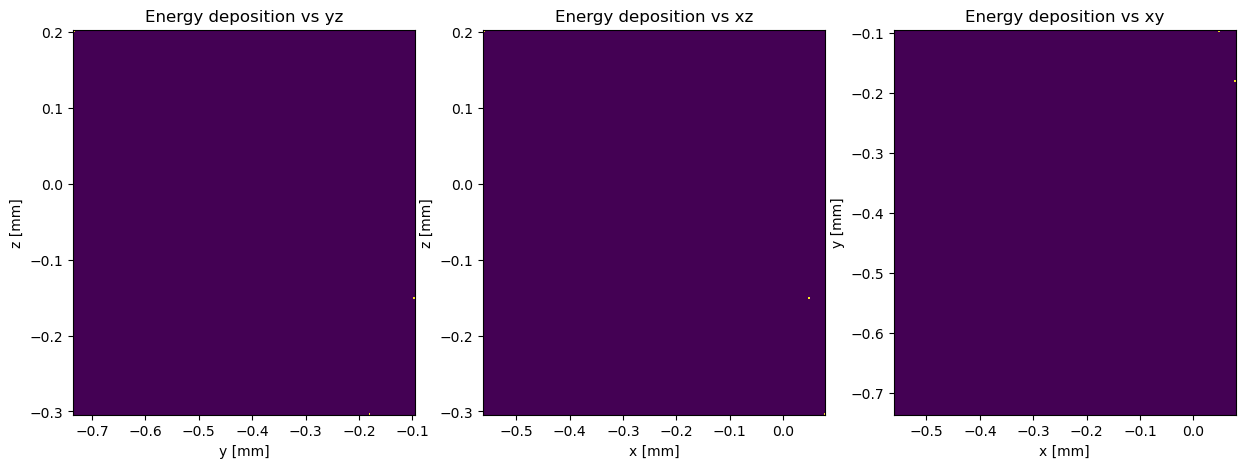

In [190]:
# hit projections
bins = 200
bins_secondary = 10
# bin in x, y, z
hits['x_bin'] = pd.cut(hits['start_x_[mm]'], bins)
hits['y_bin'] = pd.cut(hits['start_y_[mm]'], bins)
hits['z_bin'] = pd.cut(hits['start_z_[mm]'], bins_secondary)

# 2d histogram
if (True):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    # grid lines with bin
    for axis in axes:
        index = axes.tolist().index(axis)
        dim = ['yz', 'xz', 'xy'][index]
        axis.set_xlabel(f'{dim[0]} [mm]')
        axis.set_ylabel(f'{dim[1]} [mm]')
        axis.set_title(f'Energy deposition vs {dim}')
        axis.hist2d(hits[f'start_{dim[0]}_[mm]'], hits[f'start_{dim[1]}_[mm]'], bins=bins)
    plt.show()


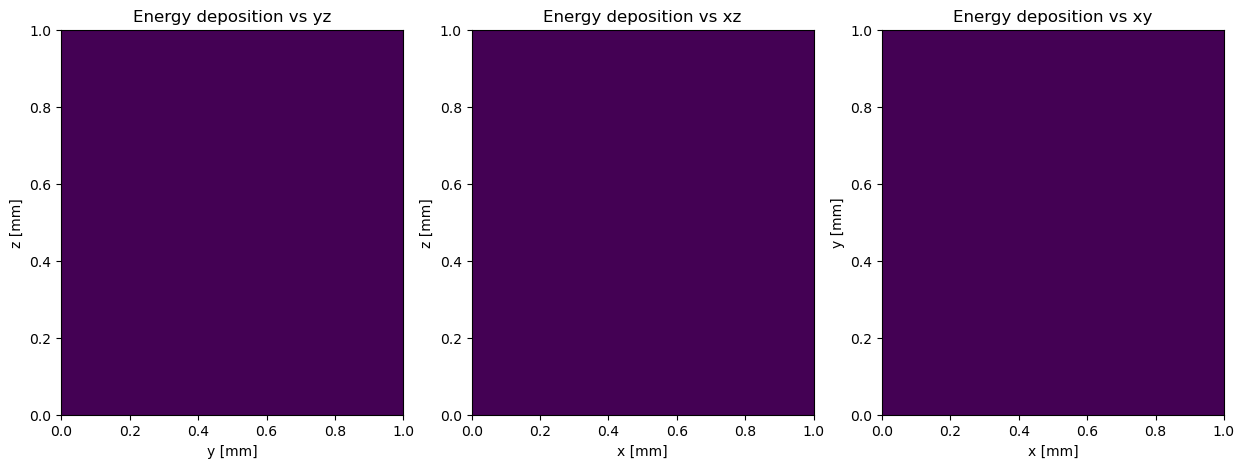

In [188]:
# hit projections for kids
bins = 200
bins_secondary = 10
kid_index = 10
# there are two relevant volumes, the inductor and the capacitor or: "kid_ind{index}" and "kid_cap{index}"
kid_hits = hits[hits['volume'].str.contains(f"kid_ind{kid_index}|kid_cap{kid_index}")]

# 2d histogram
if (True):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    # grid lines with bin
    for axis in axes:
        index = axes.tolist().index(axis)
        dim = ['yz', 'xz', 'xy'][index]
        axis.set_xlabel(f'{dim[0]} [mm]')
        axis.set_ylabel(f'{dim[1]} [mm]')
        axis.set_title(f'Energy deposition vs {dim}')
        axis.hist2d(kid_hits[f'start_{dim[0]}_[mm]'], kid_hits[f'start_{dim[1]}_[mm]'], bins=bins)
    plt.show()


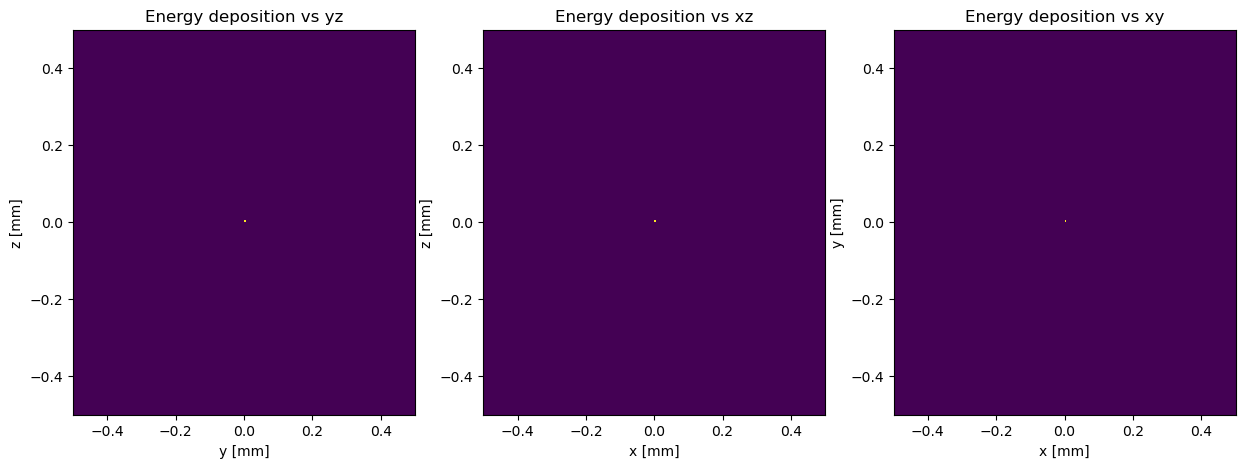

In [189]:
# primary projections
bins = 200
bins_secondary = 10
# bin in x, y, z
primaries['x_bin'] = pd.cut(primaries['start_x_[mm]'], bins)
primaries['y_bin'] = pd.cut(primaries['start_y_[mm]'], bins)
primaries['z_bin'] = pd.cut(primaries['start_z_[mm]'], bins_secondary)

# 2d histogram
if (True):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    # grid lines with bin
    for axis in axes:
        index = axes.tolist().index(axis)
        dim = ['yz', 'xz', 'xy'][index]
        axis.set_xlabel(f'{dim[0]} [mm]')
        axis.set_ylabel(f'{dim[1]} [mm]')
        axis.set_title(f'Energy deposition vs {dim}')
        axis.hist2d(primaries[f'start_{dim[0]}_[mm]'], primaries[f'start_{dim[1]}_[mm]'], bins=bins)
    plt.show()
